# Imports

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

# Dataset Loading 

In [ ]:

# Load IRIS
X_train_iris = np.load("iris_train_samples.npy")
Y_train_iris = np.load("iris_train_labels.npy")
X_val_iris = np.load("iris_val_samples.npy")
Y_val_iris = np.load("iris_val_labels.npy")

# Load MNIST
X_train_mnist = np.load("mnist_train_samples.npy")
Y_train_mnist = np.load("mnist_train_labels.npy")
X_val_mnist = np.load("mnist_val_samples.npy")
Y_val_mnist = np.load("mnist_val_labels.npy")



[]

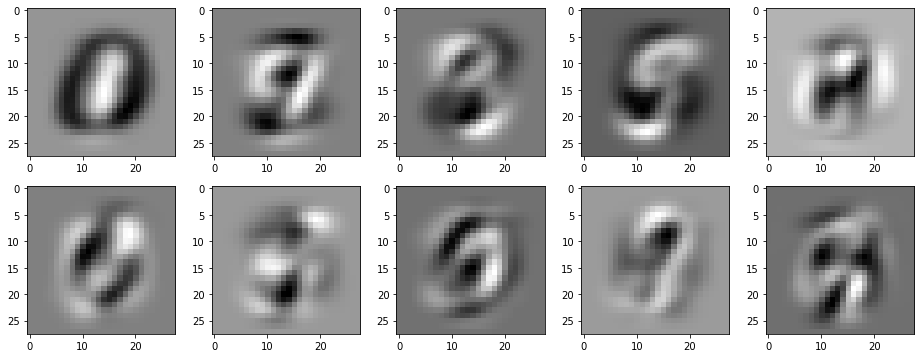

In [ ]:
# Question 2-A

# -------- SETTING UP PCA --------

def pca(X, ndims):
  # Standardazing the data
  standardX = (X - np.min(X))/np.ptp(X)

  # Covarience matrix
  # Transposing standardX for easier computation (2,d)
  covX = np.cov(standardX.T)

  # Getting the Eigenvalues & Eigenvectors 
  # Sorting in decreasing order the Eighenvectors based on the Eighenvalues
  eigVal, eigVec = np.linalg.eig(covX)
  sorted = np.argsort(-eigVal)
  eigVal = eigVal[sorted]
  eigVec = eigVec[:,sorted]

  # Average Vector
  avgVec = np.mean(eigVec, axis=0) 

  # Top ndims components
  top = eigVec[:,:ndims]

  # Returning the Average Vector and the Top nDims Components
  # Also returning all Eigenvectors for the final task.
  return avgVec, top, eigVec



# -------- INITIALISE --------
dims = 10
averageVector, topComp, eigVec = pca(X_train_mnist,dims)



# -------- PLOTTING --------

# Top 10 components displayed as images
fig, axis = plt.subplots(2, 5, figsize = (16,6))
for i in range(dims):
  img = topComp[:,i]
  renderImg = img.reshape((28,28))
  plt.subplot(2, 5, i+1)
  plt.imshow(np.real(renderImg), interpolation = "none", cmap='gray')

plt.plot()



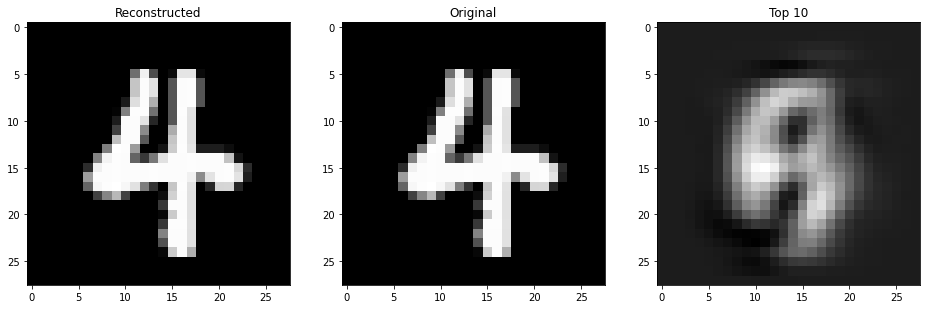

In [ ]:
# -------- RECONSTRUCTION --------
index = 18

# Using all eigenvectors from the pca function we attempt to reconstruct an
# image from the validation set.
reconAll = np.dot(np.dot(X_val_mnist[index,:],eigVec),eigVec.T)
reconAll = np.real(reconAll)

fig, axis = plt.subplots(1, 2, figsize = (16,6))

plt.subplot(1,3,1)
plt.title("Reconstructed")
plt.imshow(reconAll.reshape((28,28)), interpolation = "none", cmap='gray')

plt.subplot(1,3,2)
plt.title("Original")
plt.imshow(X_val_mnist[index,:].reshape((28,28)), interpolation = "none", cmap='gray')



# -------- ADDITIONAL RECONSTRUCTION --------
# The above should answer the question as on the coursework paper.
# However on the moodle forom I saw top 10 reconstruction was also required.
# Next few lines will attempt to reconstruct the image using top 10 eigenvectors.

reconTop = np.dot(np.dot(X_val_mnist[index,:],topComp),topComp.T)
reconTop = np.real(reconTop)

plt.subplot(1,3,3)
plt.title("Top 10")
plt.imshow(reconTop.reshape((28,28)), interpolation = "none", cmap='gray')

Based on these results we can see that using all components we can perfectly recosntruct, however top 10 wont be enough as its missing a lot of data.

In [ ]:
# Question 2-B

# Based on distance finds values to add to the cluster
# After the claster has been modified we are doing the average to find the 
# new centroid (center of the centroid)
def nextCentroids(X, k, centroids):
  
  # create an empty copy of the array centroid
  nextCent = np.empty_like(centroids)

  # Calcualtes the distance between a point value and centroid using the 
  # euclidian distance
  dist = np.sqrt(((X - centroids[:,np.newaxis])**2).sum(axis=2))
  closest = np.argmin(dist, axis=0)

  # create the clusters dictionary and initialise it with k arrays []
  clusters = {i: [] for i in range(k)}

  # We add the values based on distance to the clusters
  for i, id in enumerate(closest):
    clusters[id].append(X[i])

  # Calculate the new centroid based on the average of the cluster values
  for j in range(k):
    nextCent[j] = np.mean(clusters[j], axis = 0)

  # Return the new centroid and the clusters
  return nextCent, clusters


# Checking the centroids if they converged
def checkConvergence(old, new, tolerance):
  if np.sum(new - old) < tolerance:
    return True
  return False


# The main K-Means functions which takes the dataset and the number of clusters 
# k we want to split the data into.
# The input is X which represents a matrix of size n by m and a variable k which
# represents the number of clusters we are going to create using K-Means
# The output will be the final centroids which represents the average point in
# the middle of the claster as seen in a 2D graph. The other output will be the
# clusters key dictionaries.
def kmeans(X, k):
  # Setup the tolerance and the iteration number for the algorithm
  # choosing a large iteration wont help as in the end (of the iterations) the 
  # algorithm will give the same results
  tolerance = 0.001
  numIter = 100
  
  # Standardising/Preparing the data
  copyX = np.copy(X)
  X = (X - np.min(X))/np.ptp(X)

  # Pick random samples for the initial centroids 
  # k presents how many samples we will return
  centroids = X[np.random.choice(X.shape[0], size=k, replace = False), :]

  # Compute K-Means and iterate through the data numIter times or after the 
  # output wont change and it converges
  for i in range(numIter):
    old = centroids
    centroids, clusters = nextCentroids(copyX, k, old)
    if checkConvergence(old, centroids, tolerance):
      break
  
  # Return the final Centroids and teh Clusters
  return centroids, clusters



[]

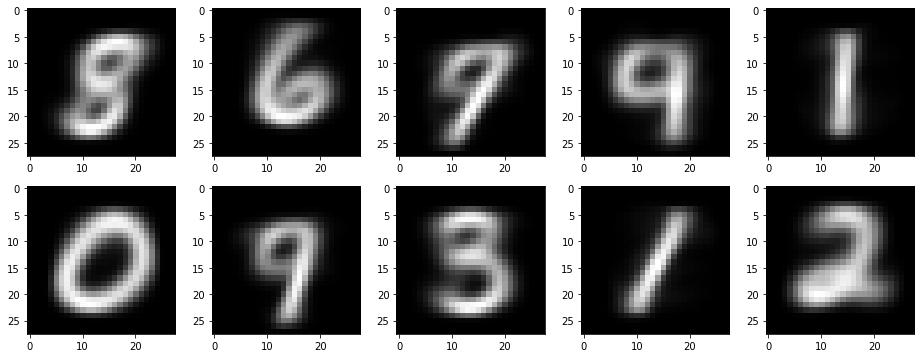

In [ ]:
# -------- INITIALISE --------

# Setup the K value for how many clusters we want to compute on the dataset
k = 10
centroids, clusters = kmeans(X_train_mnist, k)


# -------- PLOTTING --------

fig, axis = plt.subplots(2, 5, figsize=(16,6))
for i in range(k):
  img = centroids[i,:]
  plt.subplot(2,5,i+1)
  plt.imshow(img.reshape((28,28)), interpolation = "none", cmap='gray')

plt.plot()

K-Means is used for unsupervised clustering which means none of the points are classified.
In order to classify these points we are choosing (or use a method such as Elbow to find the best) K value which represents the number of clusters in our data.
The algorithm will take K random values from the dataset and will assign each to a cluster. 
Next we will iterate through each point and assignin it to a cluser based on the mean (after 2 or more values were assigned to a cluster). 
We are going to repeat this process until we optain global optima.


The most important difference between K-Means and KNNs is that KNNs is a supervised classification & regressing which is using some labeled date to classify other non labeled values.
They both use a distance based calassification to decide what class/cluster some points belong to. 
In K-Means the K represents the number of clusters we will have at the end but in KNNs we are just choosing how many labeled points will 'vote' on what the closed non labeled points is going to be.





K-Means Loss:  3.1316950918235286e+21
PCA Loss:  3.860101439912656e-20
PCA Top 10 Loss:  1671026.355405117



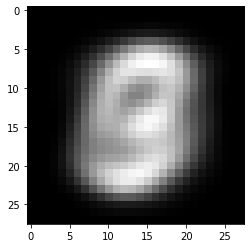

In [ ]:
# Question 2-C

# -------- K-MEANS RECONSTRUCTION LOSS --------
index = 1337 # has to be the same as the index in 2A
reconKmeans = np.dot(np.dot(X_val_mnist[index,:],centroids.T),centroids)


# -------- COMPARING RECONSTRUCTION LOSS --------
kmeans = np.sum((X_val_mnist[index,:] - reconKmeans)**2)
pca = np.sum((X_val_mnist[index,:] - reconAll)**2)
pcaTop = np.sum((X_val_mnist[index,:] - reconTop)**2)

print("K-Means Loss: ",kmeans)
print("PCA Loss: ",pca)
print("PCA Top 10 Loss: ",pcaTop)
print()

# Plotting the K-Means reconstruction
plt.imshow(reconKmeans.reshape((28,28)), interpolation = "none", cmap='gray')

Comparing the Loss of these 3 we can see that K-Means is the lowest, close to the all components PCA but much lower than Top 10 PCA.